<a href="https://colab.research.google.com/github/Briana-Sevilla/MAT-421/blob/main/Module_H_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Set 10: Module H**

\

---
\
## Section 22.1: ODE Initial Value Problem Statement

**Ordinary Differential Equation (ODE):** a differentiable equation in one dimension. This can be represented by the following: $\frac{d^nf(x)}{dx^n}$, where $n$ is the order of the differential equation.

**Partial Differential Equation (PDE):** demonstrates the relationship between a multivariable function and its partial derivative(s).

To find a particular solution to an ODE, you need an initial value; this is known as an **initial value problem.** When solving for an initial value problem, time is used as the independent variable.

\

---
\
## Section 22.2: Reduction of Order

A **reduction of order** is often used when trying to solve higher order differential equations (we reduce the order to first order). For example,

$S(t)=
\begin{bmatrix}
f(t) \\
f^{(1)}(t) \\
f^{(2)}(t) \\
\dots \\
f^{(n-1)}(t) \\
\end{bmatrix}$,

where
- $S(t)$ is the state of the system.
>Note: it is a function of time
- The elements in the vector are dependent variables that depend on the behavior of the system. In this case, they are ODEs.
>Note: $f^{(1)}(t)$ is the $1st$ derivative of the function $f(t)$, $f^{(2)}(t)$ is the $2nd$ derivative, and so on

When we take the derivitive of the state, we get

$\frac{dS(t)}{dt}=
\begin{bmatrix}
f^{(1)}(t) \\
f^{(2)}(t) \\
f^{(3)}(t) \\
\dots \\
f^{(n)}(t) \\
\end{bmatrix}$

Since an ODE can be expressed the following way:

$\frac{d^nf(x)}{dx^n} = F(x,f(x),\frac{df(x)}{dx},\frac{d^2f(x)}{dx^2},...,\frac{d^{n-1}f(x)}{dx^{n-1}})$

where $F$ is an arbitrary function that uses one or more input arguments

we can rewrite $\frac{dS(t)}{dt}$ as

$\frac{dS(t)}{dt}=
\begin{bmatrix}
f^{(1)}(t) \\
f^{(2)}(t) \\
f^{(3)}(t) \\
\dots \\
F(t,f(t),f^{(1)}(t),f^{(2)}(t),...,f^{(n-1)}(t)) \\
\end{bmatrix} =
\begin{bmatrix}
S_2(t) \\
S_3(t) \\
S_4(t) \\
\dots \\
F(t,S_1(t),S_2(t),S_3(t),...,S_{(n-1)}(t)) \\
\end{bmatrix}$,

where
- $S_i(t)$ is the $ith$ element of the state $S(t)$

Now, instead of having an $nth$ order ODE, we have $n$ number of first order ODEs.

For example, if we have the following system:

$\frac{df(t)}{dt}=4f(t)+g(t)$

$\frac{dg(t)}{dt}=3g(t)-2f(t)$,

$S(t) =
\begin{bmatrix}
f(t) \\
g(t) \\
\end{bmatrix}$ and
$\frac{dS(t)}{dt} =
\begin{bmatrix}
4f(t)+g(t) \\
3g(t)-2f(t) \\
\end{bmatrix} =
\begin{bmatrix}
4 & 1 \\
3 & -2 \\
\end{bmatrix}S(t)$

\

---
\
## Section 22.3: The Euler Method

You can find the linear approximation of $S(t)$ arounf $t_j$ at $t_{j+1}$ using the Explicit Euler Formula.

**Explicit Euler Formula:** $S(t_{j+1})=S(t_j)+hF(t_j,S(t_j))$.

where
- $S(t_{j+1})$ is the state at time $t_{j+1}$ given the state at $S(t_j)$
- h is the spacing from the time interval $[t_0,t_f]$
>Note: $t_0=0$ and $t_f=Nh$ for some integer $N$
- $\frac{dS(t)}{dt}$ is a first order ODE that equals $F(t,S(t))$

By using this formula to integrate all of the states up to $S(t_f)$ to approximate the solution of the differential equation.


Lets approximate the solution of the following initial value problem between 0 and 1 in increments if 0.1:

The differential equation $\frac{df(t)}{dt}=-e^{-t}$ with initial condition $f_0=1$
>Note: The exact solution is $f(t) = e^{-t}$

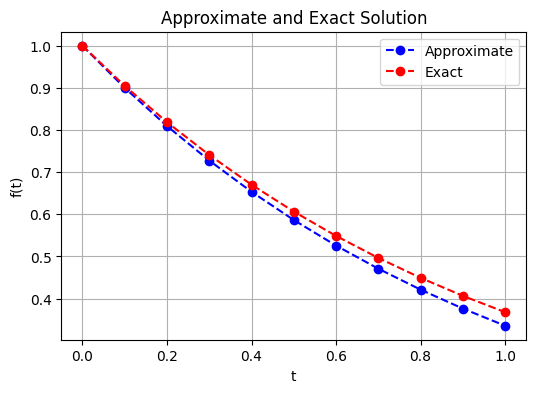

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
f = lambda t, s: -np.exp(-t) # ODE
h = 0.1 # Step size
t = np.arange(0, 1+h, h) # Creates numerical grid
S_0 = 1 # Initial condition

# Use Explicit Euler Formula
S = np.zeros(len(t)) # creates a vector of 11 zeros
S[0] = S_0 # Replaces first element of vector with initial condition

for i in range(0, len(t) - 1):
  S[i + 1] = S[i] + h*f(t[i], S[i]) # Explicit Euler Formula


# Plot graph
plt.figure(figsize = (6,4))
plt.plot(t,S, 'bo--', label='Approximate')
plt.plot(t, np.exp(-t), 'ro--', label='Exact')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Approximate and Exact Solution')
plt.legend()
plt.grid()
plt.show()


>Note: The approximation's accuracy increases with a smaller step size

Lets verify this by using the exact code above but changing $h$ to $h=0.01$

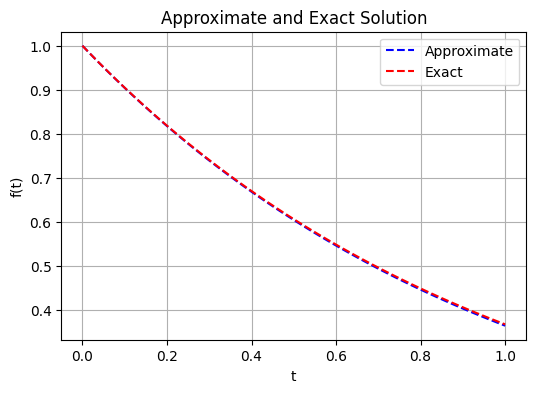

In [7]:
# Define parameters
f = lambda t, s: -np.exp(-t) # ODE
h = 0.01 # Step size
t = np.arange(0, 1+h, h) # Creates numerical grid
S_0 = 1 # Initial condition

# Use Explicit Euler Formula
S = np.zeros(len(t)) # creates a vector of 11 zeros
S[0] = S_0 # Replaces first element of vector with initial condition

for i in range(0, len(t) - 1):
  S[i + 1] = S[i] + h*f(t[i], S[i]) # Explicit Euler Formula


# Plot graph
plt.figure(figsize = (6,4))
plt.plot(t,S, 'b--', label='Approximate')
plt.plot(t, np.exp(-t), 'r--', label='Exact')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Approximate and Exact Solution')
plt.legend()
plt.grid()
plt.show()

You can also solve the initial value problem with the following:

- **Implicit Euler Formula:** $S({j+1}) = S(t_j)+hF(t_{j+1},S(t_{j+1}))$

- **Trapezoidal Formula:** $S({j+1}) = S(t_j)+\frac{h}{2}(F(t_j,S(t_j))+F(t_{j+1},S(t_{j+1})))$
> Note: this is the average of the Explicit and Implicit Euler formulas


\

---
\
$\heartsuit End \heartsuit$